# Introduction to regular expressions

## Dependances

In [10]:
import re
import os 
import sys
from urllib.request import urlopen


In [11]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from bs4 import BeautifulSoup


In [12]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [13]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [14]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'The United Nations General Assembly (UNGA or GA; French: AssemblÃ©e gÃ©nÃ©rale, AG) is one of the six principal organs of the United Nations (UN), serving as the main deliberative, policymaking, and representative organ of the UN. Its powers, composition, functions, and procedures are set out in Chapter IV of the United Nations Charter. The UNGA is responsible for the UN budget, appointing the non-permanent members to the Security Council, appointing the Secretary-General of the United Nations, receiving reports from other parts of the UN system, and making recommendations through resolutions.[1] It also establishes numerous subsidiary organs to advance or assist in its broad mandate.[2] The UNGA is the only UN organ wherein all member states have equal representation.\n\nThe General Assembly meets under its president or the UN Secretary-General in annual sessions at UN headquarters in New York City; the main part of these meetings generally run from September to part of January until

### from url

In [15]:
# url = "http://astronautix.com/s/salyut.html"
# html = urlopen(url).read()


# text = BeautifulSoup(html, 'html.parser').get_text()
# text[:200]

## Sentence tokenizing:

In [16]:
sentences=sent_tokenize(text)

print(len(sentences))

sentences

21


['The United Nations General Assembly (UNGA or GA; French: AssemblÃ©e gÃ©nÃ©rale, AG) is one of the six principal organs of the United Nations (UN), serving as the main deliberative, policymaking, and representative organ of the UN.',
 'Its powers, composition, functions, and procedures are set out in Chapter IV of the United Nations Charter.',
 'The UNGA is responsible for the UN budget, appointing the non-permanent members to the Security Council, appointing the Secretary-General of the United Nations, receiving reports from other parts of the UN system, and making recommendations through resolutions.',
 '[1] It also establishes numerous subsidiary organs to advance or assist in its broad mandate.',
 '[2] The UNGA is the only UN organ wherein all member states have equal representation.',
 'The General Assembly meets under its president or the UN Secretary-General in annual sessions at UN headquarters in New York City; the main part of these meetings generally run from September to p

## Word tokenizing

In [17]:
words=word_tokenize(text)
print(len(words))

print(words)

607
['The', 'United', 'Nations', 'General', 'Assembly', '(', 'UNGA', 'or', 'GA', ';', 'French', ':', 'AssemblÃ©e', 'gÃ©nÃ©rale', ',', 'AG', ')', 'is', 'one', 'of', 'the', 'six', 'principal', 'organs', 'of', 'the', 'United', 'Nations', '(', 'UN', ')', ',', 'serving', 'as', 'the', 'main', 'deliberative', ',', 'policymaking', ',', 'and', 'representative', 'organ', 'of', 'the', 'UN', '.', 'Its', 'powers', ',', 'composition', ',', 'functions', ',', 'and', 'procedures', 'are', 'set', 'out', 'in', 'Chapter', 'IV', 'of', 'the', 'United', 'Nations', 'Charter', '.', 'The', 'UNGA', 'is', 'responsible', 'for', 'the', 'UN', 'budget', ',', 'appointing', 'the', 'non-permanent', 'members', 'to', 'the', 'Security', 'Council', ',', 'appointing', 'the', 'Secretary-General', 'of', 'the', 'United', 'Nations', ',', 'receiving', 'reports', 'from', 'other', 'parts', 'of', 'the', 'UN', 'system', ',', 'and', 'making', 'recommendations', 'through', 'resolutions', '.', '[', '1', ']', 'It', 'also', 'establishes', 

## Find the frequency distribution

In [18]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('the', 50),
 ('of', 30),
 (',', 29),
 ('.', 20),
 ('and', 14),
 ('to', 14),
 ('UN', 11),
 ('Assembly', 10),
 ('a', 9),
 ('in', 8)]

## Plot the frequency graph

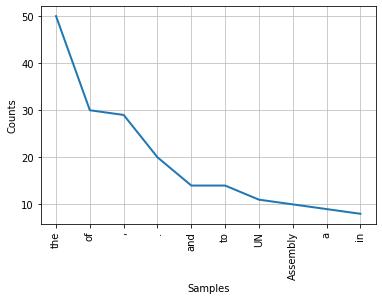

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
import matplotlib.pyplot as plt

fdist.plot(10)

## Remove punctuation marks

In [20]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['The', 'United', 'Nations', 'General', 'Assembly', 'UNGA', 'or', 'GA', 'French', 'AG', 'is', 'one', 'of', 'the', 'six', 'principal', 'organs', 'of', 'the', 'United', 'Nations', 'UN', 'serving', 'as', 'the', 'main', 'deliberative', 'policymaking', 'and', 'representative', 'organ', 'of', 'the', 'UN', 'Its', 'powers', 'composition', 'functions', 'and', 'procedures', 'are', 'set', 'out', 'in', 'Chapter', 'IV', 'of', 'the', 'United', 'Nations']
502


## Plotting graph without punctuation marks

In [21]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('the', 50),
 ('of', 30),
 ('and', 14),
 ('to', 14),
 ('UN', 11),
 ('Assembly', 10),
 ('a', 9),
 ('in', 8),
 ('The', 7),
 ('or', 6)]

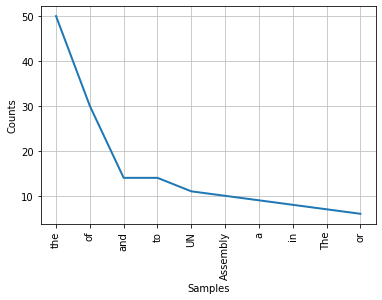

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
fdist.plot(10)

## List of stopwords

In [23]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Removing stopwords

In [24]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['The', 'United', 'Nations', 'General', 'Assembly', 'UNGA', 'GA', 'French', 'AG', 'one', 'six', 'principal', 'organs', 'United', 'Nations', 'UN', 'serving', 'main', 'deliberative', 'policymaking', 'representative', 'organ', 'UN', 'Its', 'powers', 'composition', 'functions', 'procedures', 'set', 'Chapter', 'IV', 'United', 'Nations', 'Charter', 'The', 'UNGA', 'responsible', 'UN', 'budget', 'appointing', 'members', 'Security', 'Council', 'appointing', 'United', 'Nations', 'receiving', 'reports', 'parts', 'UN', 'system', 'making', 'recommendations', 'resolutions', 'It', 'also', 'establishes', 'numerous', 'subsidiary', 'organs', 'advance', 'assist', 'broad', 'mandate', 'The', 'UNGA', 'UN', 'organ', 'wherein', 'member', 'states', 'equal', 'representation', 'The', 'General', 'Assembly', 'meets', 'president', 'UN', 'annual', 'sessions', 'UN', 'headquarters', 'New', 'York', 'City', 'main', 'part', 'meetings', 'generally', 'run', 'September', 'part', 'January', 'issues', 'addressed', 'often', 'n

## Final frequency distribution

In [25]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('UN', 11),
 ('Assembly', 10),
 ('The', 7),
 ('peace', 5),
 ('United', 4),
 ('Nations', 4),
 ('General', 4),
 ('recommendations', 4),
 ('member', 4),
 ('developing', 4)]

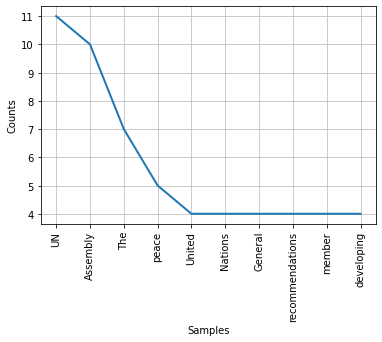

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
fdist.plot(10)

## Word Cloud

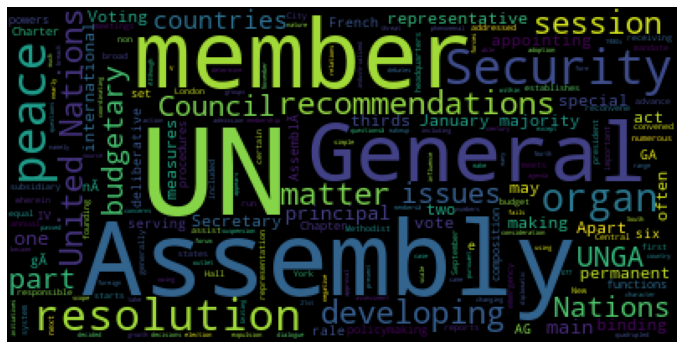

In [27]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [28]:
clean_words_joined=' '.join(clean_words)

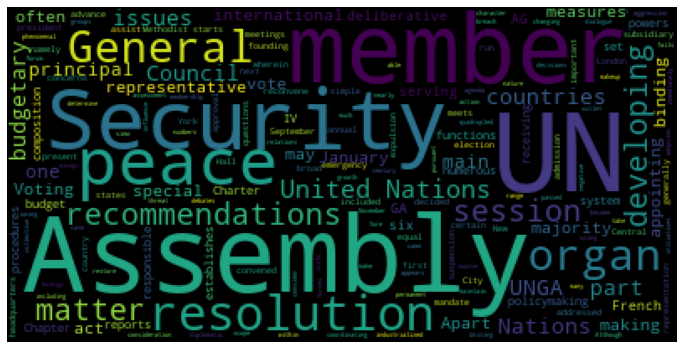

In [29]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

## Stemming

In [30]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

['program', 'programm', 'programm', 'orbit', 'electr', 'studi', 'leav', 'play', 'am', 'is', 'were']


## Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

word_list--->['Programming', 'Programmers', 'Programmable', 'orbiter', 'electrical', 'studies', 'leaves', 'plays', 'am', 'is', 'were']
 POS:v
['Programming', 'Programmers', 'Programmable', 'orbiter', 'electrical', 'study', 'leave', 'play', 'be', 'be', 'be']
 POS:n
['Programming', 'Programmers', 'Programmable', 'orbiter', 'electrical', 'study', 'leaf', 'play', 'am', 'is', 'were']
 POS:a
['Programming', 'Programmers', 'Programmable', 'orbiter', 'electrical', 'studies', 'leaves', 'plays', 'am', 'is', 'were']
 POS:r
['Programming', 'Programmers', 'Programmable', 'orbiter', 'electrical', 'studies', 'leaves', 'plays', 'am', 'is', 'were']


## Part of Speech Tagging (PoS tagging)

In [32]:
tag=nltk.pos_tag(word_list)
print(tag)

[('Programming', 'VBG'), ('Programmers', 'NNP'), ('Programmable', 'NNP'), ('orbiter', 'RB'), ('electrical', 'JJ'), ('studies', 'NNS'), ('leaves', 'VBZ'), ('plays', 'NNS'), ('am', 'VBP'), ('is', 'VBZ'), ('were', 'VBD')]


In [33]:
sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'

# sentence="""Oversee and direct daily test activities at the Cameron Technology Development Center. 
# Lead test lab projects for Drilling and Production systems, R&D testing, product development, product design qualification, performance verification, 
# and product testing/demonstrations. Manage cross-functional team of engineers and technicians for 200+ annual test plans."""

sentence="""The LM while in powered descent is a cross between a helicopter and a spacecraft.
Jim Dowd will pilot the spacecraft."""

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)

tagged_words

[('The', 'DT'),
 ('LM', 'NNP'),
 ('while', 'IN'),
 ('in', 'IN'),
 ('powered', 'JJ'),
 ('descent', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('cross', 'NN'),
 ('between', 'IN'),
 ('a', 'DT'),
 ('helicopter', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('spacecraft', 'NN'),
 ('.', '.'),
 ('Jim', 'NNP'),
 ('Dowd', 'NNP'),
 ('will', 'MD'),
 ('pilot', 'VB'),
 ('the', 'DT'),
 ('spacecraft', 'NN'),
 ('.', '.')]

## Chunking

In [34]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)

(S
  The/DT
  LM/NNP
  while/IN
  in/IN
  (NP powered/JJ descent/NN)
  is/VBZ
  (NP a/DT cross/NN)
  between/IN
  (NP a/DT helicopter/NN)
  and/CC
  (NP a/DT spacecraft/NN)
  ./.
  Jim/NNP
  Dowd/NNP
  will/MD
  pilot/VB
  (NP the/DT spacecraft/NN)
  ./.)


In [35]:
output.draw()

## Chinking

In [36]:
grammar=r"""NP : {<.*>+}
}<JJ>+{"""
parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)

(S
  (NP The/DT LM/NNP while/IN in/IN)
  powered/JJ
  (NP
    descent/NN
    is/VBZ
    a/DT
    cross/NN
    between/IN
    a/DT
    helicopter/NN
    and/CC
    a/DT
    spacecraft/NN
    ./.
    Jim/NNP
    Dowd/NNP
    will/MD
    pilot/VB
    the/DT
    spacecraft/NN
    ./.))


In [37]:
output.draw()

## Named Entity Recognition (NER)

In [38]:
sentence="""Jim Dowd served in the Mission Control Center as the System Engineering & Integration Office (SE&I) Representative for the Mission Evaluation Room (MER) console."""

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  (PERSON Jim/NNP)
  (PERSON Dowd/NNP)
  served/VBD
  in/IN
  the/DT
  (ORGANIZATION Mission/NNP Control/NNP Center/NNP)
  as/IN
  the/DT
  (ORGANIZATION System/NNP)
  Engineering/NNP
  &/CC
  (ORGANIZATION Integration/NNP)
  Office/NNP
  (/(
  (ORGANIZATION SE/NNP)
  &/CC
  I/PRP
  )/)
  Representative/NN
  for/IN
  the/DT
  (ORGANIZATION Mission/NNP Evaluation/NNP Room/NNP)
  (/(
  (ORGANIZATION MER/NNP)
  )/)
  console/NN
  ./.)


In [39]:
N_E_R.draw()

## WordNet

In [40]:
from nltk.corpus import wordnet



In [41]:
for words in wordnet.synsets('car'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

car.n.01
a motor vehicle with four wheels; usually propelled by an internal combustion engine
['he needs a car to get to work']

Lemma('car.n.01.car')
Lemma('car.n.01.auto')
Lemma('car.n.01.automobile')
Lemma('car.n.01.machine')
Lemma('car.n.01.motorcar')


car.n.02
a wheeled vehicle adapted to the rails of railroad
['three cars had jumped the rails']

Lemma('car.n.02.car')
Lemma('car.n.02.railcar')
Lemma('car.n.02.railway_car')
Lemma('car.n.02.railroad_car')


car.n.03
the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
[]

Lemma('car.n.03.car')
Lemma('car.n.03.gondola')


car.n.04
where passengers ride up and down
['the car was on the top floor']

Lemma('car.n.04.car')
Lemma('car.n.04.elevator_car')


cable_car.n.01
a conveyance for passengers or freight on a cable railway
['they took a cable car to the top of the mountain']

Lemma('cable_car.n.01.cable_car')
Lemma('cable_car.n.01.car')




###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [42]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

[Synset('vehicle.n.01')]


### Hyponyms: Hyponyms gives us a more specific term for a word.

In [43]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

[Synset('missile.n.01'), Synset('multistage_rocket.n.01'), Synset('test_rocket.n.01')]


In [44]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

['missile.n.01', 'multistage_rocket.n.01', 'test_rocket.n.01']

### Get a name only

In [45]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

rocket


### Synonyms.

In [46]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

['rocket',
 'projectile',
 'rocket',
 'rocket_engine',
 'rocket',
 'roquette',
 'garden_rocket',
 'rocket_salad',
 'arugula',
 'Eruca_sativa',
 'Eruca_vesicaria_sativa',
 'rocket',
 'skyrocket',
 'skyrocket',
 'rocket',
 'rocket',
 'skyrocket',
 'rocket']

### Antonyms

In [47]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

['unnatural', 'artificial', 'supernatural', 'sharp']

### Synonyms and antonyms

In [48]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

synonyms:
['natural', 'natural', 'cancel', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'instinctive', 'natural', 'raw', 'rude', 'natural', 'natural', 'born', 'innate', 'lifelike', 'natural']

antonyms:
['unnatural', 'artificial', 'supernatural', 'sharp']



###  Finding the similarity between words

In [49]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


0.4

# Bag-of-Words

In [50]:
# from collections import Counter

# text=text.lower()
# Counter(word_tokenize(text))

# Counter(text).most_common(2)
# Counter(word_tokenize(text)).most_common(2)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# sentences=['Jim is a person', 'Jim likes to fly.', 'Jim wants to walk his dog.']

cv=CountVectorizer()

B_O_W= cv.fit_transform(sentences).toarray()



In [52]:
print(cv.vocabulary_)

{'the': 226, 'united': 239, 'nations': 148, 'general': 98, 'assembly': 31, 'unga': 238, 'or': 166, 'ga': 97, 'french': 93, 'assemblã': 32, 'gã': 102, 'nã': 160, 'rale': 190, 'ag': 16, 'is': 118, 'one': 164, 'of': 161, 'six': 215, 'principal': 184, 'organs': 168, 'un': 236, 'serving': 210, 'as': 30, 'main': 126, 'deliberative': 71, 'policymaking': 180, 'and': 22, 'representative': 198, 'organ': 167, 'its': 121, 'powers': 181, 'composition': 59, 'functions': 95, 'procedures': 185, 'are': 29, 'set': 213, 'out': 170, 'in': 111, 'chapter': 54, 'iv': 122, 'charter': 56, 'responsible': 202, 'for': 87, 'budget': 44, 'appointing': 27, 'non': 154, 'permanent': 178, 'members': 141, 'to': 234, 'security': 208, 'council': 65, 'secretary': 207, 'receiving': 192, 'reports': 196, 'from': 94, 'other': 169, 'parts': 175, 'system': 223, 'making': 131, 'recommendations': 193, 'through': 233, 'resolutions': 201, 'it': 120, 'also': 20, 'establishes': 82, 'numerous': 159, 'subsidiary': 221, 'advance': 15, 'a

In [53]:
print(cv.get_feature_names())

['10', '193', '1945', '1946', '1950', '1980s', '21st', '377', '51', 'able', 'act', 'action', 'addressed', 'admission', 'adoption', 'advance', 'ag', 'agenda', 'aggression', 'all', 'also', 'although', 'and', 'annual', 'any', 'apart', 'appears', 'appointing', 'approval', 'are', 'as', 'assembly', 'assemblã', 'assessment', 'assist', 'at', 'be', 'became', 'because', 'before', 'between', 'binding', 'breach', 'broad', 'budget', 'budgetary', 'by', 'came', 'can', 'case', 'central', 'century', 'certain', 'changing', 'chapter', 'character', 'charter', 'city', 'collective', 'composition', 'concerns', 'consider', 'consideration', 'convened', 'coordinating', 'council', 'countries', 'country', 'debates', 'decided', 'decisions', 'deliberative', 'determine', 'developing', 'dialogue', 'diplomatic', 'do', 'during', 'each', 'election', 'emergency', 'equal', 'establishes', 'except', 'expulsion', 'fails', 'first', 'for', 'forces', 'fore', 'foreign', 'forum', 'founding', 'french', 'from', 'functions', 'g77', 

c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
print(B_O_W)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm=None)

X=vectorizer.fit_transform(sentences).toarray()


In [56]:
print(vectorizer.vocabulary_)

{'the': 226, 'united': 239, 'nations': 148, 'general': 98, 'assembly': 31, 'unga': 238, 'or': 166, 'ga': 97, 'french': 93, 'assemblã': 32, 'gã': 102, 'nã': 160, 'rale': 190, 'ag': 16, 'is': 118, 'one': 164, 'of': 161, 'six': 215, 'principal': 184, 'organs': 168, 'un': 236, 'serving': 210, 'as': 30, 'main': 126, 'deliberative': 71, 'policymaking': 180, 'and': 22, 'representative': 198, 'organ': 167, 'its': 121, 'powers': 181, 'composition': 59, 'functions': 95, 'procedures': 185, 'are': 29, 'set': 213, 'out': 170, 'in': 111, 'chapter': 54, 'iv': 122, 'charter': 56, 'responsible': 202, 'for': 87, 'budget': 44, 'appointing': 27, 'non': 154, 'permanent': 178, 'members': 141, 'to': 234, 'security': 208, 'council': 65, 'secretary': 207, 'receiving': 192, 'reports': 196, 'from': 94, 'other': 169, 'parts': 175, 'system': 223, 'making': 131, 'recommendations': 193, 'through': 233, 'resolutions': 201, 'it': 120, 'also': 20, 'establishes': 82, 'numerous': 159, 'subsidiary': 221, 'advance': 15, 'a

In [57]:
print(vectorizer.get_feature_names())

['10', '193', '1945', '1946', '1950', '1980s', '21st', '377', '51', 'able', 'act', 'action', 'addressed', 'admission', 'adoption', 'advance', 'ag', 'agenda', 'aggression', 'all', 'also', 'although', 'and', 'annual', 'any', 'apart', 'appears', 'appointing', 'approval', 'are', 'as', 'assembly', 'assemblã', 'assessment', 'assist', 'at', 'be', 'became', 'because', 'before', 'between', 'binding', 'breach', 'broad', 'budget', 'budgetary', 'by', 'came', 'can', 'case', 'central', 'century', 'certain', 'changing', 'chapter', 'character', 'charter', 'city', 'collective', 'composition', 'concerns', 'consider', 'consideration', 'convened', 'coordinating', 'council', 'countries', 'country', 'debates', 'decided', 'decisions', 'deliberative', 'determine', 'developing', 'dialogue', 'diplomatic', 'do', 'during', 'each', 'election', 'emergency', 'equal', 'establishes', 'except', 'expulsion', 'fails', 'first', 'for', 'forces', 'fore', 'foreign', 'forum', 'founding', 'french', 'from', 'functions', 'g77', 

In [58]:
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 3.39789527 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
